<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Phyton_kriring: Experimental variogram </font>
</div>

- **Fecha**: 2022/11/11
        
- **Objetivos**: Test Theoretical variogram 

- **Descripción** Tutorial for determining how it works

- **Referencias**: -

- **Autores**: 
    - Luis Miguel Sánchez Brea

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.dpi'] = 100

In [4]:
from phyton_kriging import np, plt

from phyton_kriging.variogram_1D import experimental, theoretical

In [5]:
class theoretical(object):
    """Class for unidimensional 1D Variogram.

    Parameters:
        h (numpy.array): linear array with equidistant positions.
            The number of data is preferibly :math:`2^n` .
        variogram (numpy.array): linear array with equidistant positions.
            The number of data is preferibly :math:`2^n` .
        parameters (dict):
        type (str):

    Attributes:
        self.x (numpy.array): .
    """

    def __init__(self, h=None):
        self.h = h
        self.variogram = None
        self.parameters = None
        self.type = None

    def __str__(self):
        """Represents main data of the atributes."""

        print("name = {}\n".format(self.type))
        print("h: min - {}, max - {}".format(self.h.min(), self.h.max()))
        print("variogram: min - {}, max - {}".format(self.variogram.min(),
                                                     self.variogram.max()))
        print("parameters = {}".format(self.parameters))
        return ("")

    # def __getattr__(self, name: str):
    #     print("in getter")
    #     return self.__dict__[f"_{name}"]

    # def __setattr__(self, name, value):
    #     print("in setter")
    #     self.__dict__[f"_{name}"] = value

    def get(self, h, type=None, parameters=None):
        """Get result, using self.parameters and name.

        Args:
            h (_type_): _description_
        """
        if type is None:
            type = self.type
        if parameters is None:
            parameters == self.parameters

        if type == 'constant':
            var_new = self.constant(h=h, **self.parameters)

        elif type == 'gauss':
            var_new = self.gauss(h=h, **self.parameters)

        elif type == 'exponential':
            var_new = self.exponential(h=h, **self.parameters)

        elif type == 'spherical':
            var_new = self.spherical(h=h, **self.parameters)

        elif type == 'cubic':
            var_new = self.cubic(h=h, **self.parameters)

        elif type == 'potential':
            var_new = self.potential(h=h, **self.parameters)

        return var_new

    def constant(self, sc, A=None, lc=None, power=None, h=None):
        """variogram constante
        A y lc son inutiles, por continuidad con el resto
        """
        if h is None:
            h = self.h
            has_return = False
            self.type = 'constant'
            self.parameters = dict(sc=sc, A=A, lc=lc, power=power)
        else:
            has_return = True

        variogram = sc**2 * np.ones_like(h)
        if has_return is False:
            self.variogram = variogram
        else:
            return variogram

    def gauss(self, sc, A, lc, power=None, h=None):
        """variogram gaussiano"""
        if h is None:
            h = self.h
            has_return = False
            self.type = 'gauss'
            self.parameters = dict(sc=sc, A=A, lc=lc, power=power)
        else:
            has_return = True

        variogram = sc**2 + A * (1 - np.exp(-h**2 / lc**2))
        if has_return is False:
            self.variogram = variogram
        else:
            return variogram

    def exponential(self, sc, A, lc, power=None, h=None):
        """variogram exponencial"""
        if h is None:
            h = self.h
            has_return = False
            self.type = 'exponential'
            self.parameters = dict(sc=sc, A=A, lc=lc, power=power)
        else:
            has_return = True

        variogram = sc**2 + A * (1 - np.exp(-h / lc))
        if has_return is False:
            self.variogram = variogram
        else:
            return variogram

    def spherical(self, sc, A, lc, power=None, h=None):
        """variogram spherical"""
        if h is None:
            h = self.h
            has_return = False
            self.type = 'spherical'
            self.parameters = dict(sc=sc, A=A, lc=lc, power=power)
        else:
            has_return = True

        variogram = sc**2 + A * (1.5 * h / lc - 0.5 * (h / lc)**3)
        if (h > lc).any():
            variogram[h > lc] = sc**2 + A
        variogram = variogram
        if has_return is False:
            self.variogram = variogram
        else:
            return variogram

    def cubic(self, sc, A, lc, power=None, h=None):
        """variogram cúbico"""
        if h is None:
            h = self.h
            has_return = False
            self.parameters = dict(sc=sc, A=A, lc=lc, power=power)
            self.type = 'cubic'
        else:
            has_return = True
        h_norm = h / lc
        variogram = sc**2 + A * (7 * h_norm**2 - 35 / 4 * h_norm**3 +
                                 7 / 2 * h_norm**5 - 3 / 4 * h_norm**7)
        if (h > lc).any():
            variogram[h > lc] = sc**2 + A
        variogram = variogram
        if has_return is False:
            self.variogram = variogram
        else:
            return variogram

    def potential(self, sc, A, lc, power=None, h=None):
        """variogram potencial"""
        if h is None:
            h = self.h
            has_return = False
            self.parameters = dict(sc=sc, A=A, lc=lc, power=power)
            self.type = 'potential'
        else:
            has_return = True
        variogram = sc**2 + A * (h / lc)**power
        if has_return is False:
            self.variogram = variogram
        else:
            return variogram

    def draw(self, kind='sqrt'):
        """Draws teh variogram

        Args:
            kind (str, optional): 'sqrt' or 'normal'. Defaults to 'normal'.
        """
        plt.figure()
        if kind == 'sqrt':
            plt.plot(self.h, np.sqrt(self.variogram), 'k', label='theory')
            plt.ylabel('$\sqrt{\gamma(h)}$')
        else:
            plt.plot(self.h, self.variogram, 'k', label='theory')
            plt.ylabel('$\gamma(h)$')

        plt.ylim(0)
        plt.xlim(self.h[0], self.h[-1])
        plt.legend()
        plt.xlabel('h')

In [6]:
class experimental(object):
    """Class for unidimensional experimental 1D Variogram.

    Parameters:
        h (numpy.array): linear array with equidistant positions.
            The number of data is preferibly :math:`2^n` .

    Attributes:
        self.x (numpy.array): Linear array with equidistant positions.
            The number of data is preferibly :math:`2^n`.
    """

    def __init__(self, x, y):

        self.x = x
        self.y = y
        self.h = None
        self.variogram = None
        self.num_h = None
        self.i_pos = None

    def __str__(self):
        """Represents main data of the atributes."""

        print("name = {}\n".format(self.type))
        print("h: min - {}, max - {}".format(self.h.min(), self.h.max()))
        print("variogram: min - {}, max - {}".format(self.variogram.min(),
                                                     self.variogram.max()))
        print("parameters = {}".format(self.parameters))
        return ("")

    # def __getattr__(self, name: str):
    #     print("in getter")
    #     return self.__dict__[f"_{name}"]

    # def __setattr__(self, name, value):
    #     print("in setter")
    #     self.__dict__[f"_{name}"] = value

    def compute(self, ipoints):
        variogram = np.zeros_like(ipoints, dtype=float)
        num_points = np.zeros_like(ipoints, dtype=int)

        num_data = len(self.y)
        num_h = ipoints.size

        data = self.y
        for i in np.arange(0, num_h):
            hi = ipoints[i]
            VAR = 0
            n_data = 0
            for j in np.arange(1, hi + 1):
                positions = np.arange(j, num_data, hi, dtype='int')
                values = self.y[positions]
                diffs = np.diff(values)**2
                VAR = VAR + diffs.sum()
                n_data = n_data + diffs.size

            if n_data > 0:
                variogram[i] = VAR / (2 * n_data)
            else:
                variogram[i] = -1
            num_points[i] = n_data

        # Remove points with no data
        i_remove = np.argwhere(num_points == 0)
        # data = np.delete(data, i_remove)
        variogram = np.delete(variogram, i_remove)
        num_points = np.delete(num_points, i_remove)
        ipoints = np.delete(ipoints, i_remove)

        incr_h = self.x[1] - self.x[0]
        self.h = ipoints * incr_h
        self.variogram = variogram
        self.num_h = num_points
        self.i_pos = ipoints
        # self.imax = len(self.h)

    def get_seed(self):
        """
		calcula los parámetros iniciales para el ajuste del variogram
		"""
        point_central = (self.variogram.max() + self.variogram.min()) / 2
        imenor, _, _ = nearest(self.variogram, point_central)
        param_ini = np.array(
            [self.variogram[0],
             self.variogram.max(), self.h[imenor]])

        if self.function_ajuste in [variogram_potencial]:
            param_ini = np.append(param_ini, [3])

        return param_ini

    def draw(self, kind='sqrt'):
        """Draws teh variogram

        Args:
            kind (str, optional): 'sqrt' or 'normal'. Defaults to 'normal'.
        """
        plt.figure()
        if kind == 'sqrt':
            plt.plot(self.h,
                     np.sqrt(self.variogram),
                     'k',
                     label='experimental')
            plt.ylabel('$\sqrt{\gamma(h)}$')
        else:
            plt.plot(self.h, self.variogram, 'k', label='experimental')
            plt.ylabel('$\gamma(h)$')

        plt.ylim(0)
        plt.xlim(self.h[0], self.h[-1])
        plt.legend()
        plt.xlabel('h')


# Experimental variogram 

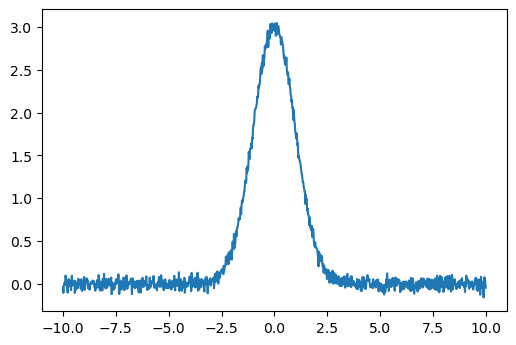

In [7]:
sc_initial = .05

x = np.linspace(-10, 10, 1000)
y = np.sin(2 * np.pi * x / 1) + sc_initial * np.random.randn(len(x))
y = 3 * np.exp(-x**2 / (2 * 1**2)) + sc_initial * np.random.randn(len(x))

i_points = np.arange(0, 250)

plt.plot(x, y)

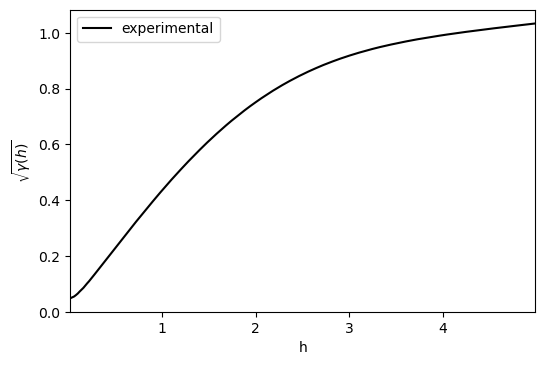

In [8]:
var_exp = experimental(x, y)
var_exp.compute(i_points)
var_exp.draw()


# Optimizacion por PSO

In [9]:
from pyswarms.single.global_best import GlobalBestPSO
from pyswarms.utils.plotters import plot_cost_history

In [10]:
""""
# Experimental
h_fitting = var_exp.h
f_fitting = var_exp.variogram
print(var_exp.h.shape)

var_theo = theoretical(h=h_fitting)
var_theo.gauss(0.05,1,2.5)
var_theo.draw()

plt.plot(var_exp.h, var_exp.variogram)
"""""

In [11]:
def cost_variogram(params, var_exp):
    var_theo = theoretical(h=var_exp.h)
    sc=params[0]
    A=params[1]
    lc = params[2]
    
    var_theo.gauss(sc, A, lc)
    
    std = np.sqrt(((var_exp.variogram - var_theo.variogram)**2).mean())
   
    return std

In [12]:
def opt_func(params):
    n_particles = params.shape[0]  # number of particles
    std = [cost_variogram(params[i,:],var_exp) for i in range(n_particles)]
    return std

In [13]:
num_transitions = 3
num_iters = 200  # suelen ser más
num_particles = 100  # suelen ser más


min_bound = np.array([0, 0, 0])
max_bound = np.array([1, 1, 5])
bounds = (min_bound, max_bound)


In [14]:
%%time
options = {'c1': 0.5, 'c2': 0.6, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=num_particles, dimensions=num_transitions, options=options, bounds=bounds)

CPU times: user 13.7 ms, sys: 3.47 ms, total: 17.2 ms
Wall time: 15.4 ms


In [15]:
cost, pos_final = optimizer.optimize(opt_func,iters=num_iters)


2023-03-29 07:56:48,617 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.6, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=0.016 
2023-03-29 07:56:50,863 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.016028810541270623, best pos: [0.1599 0.9989 2.2911]


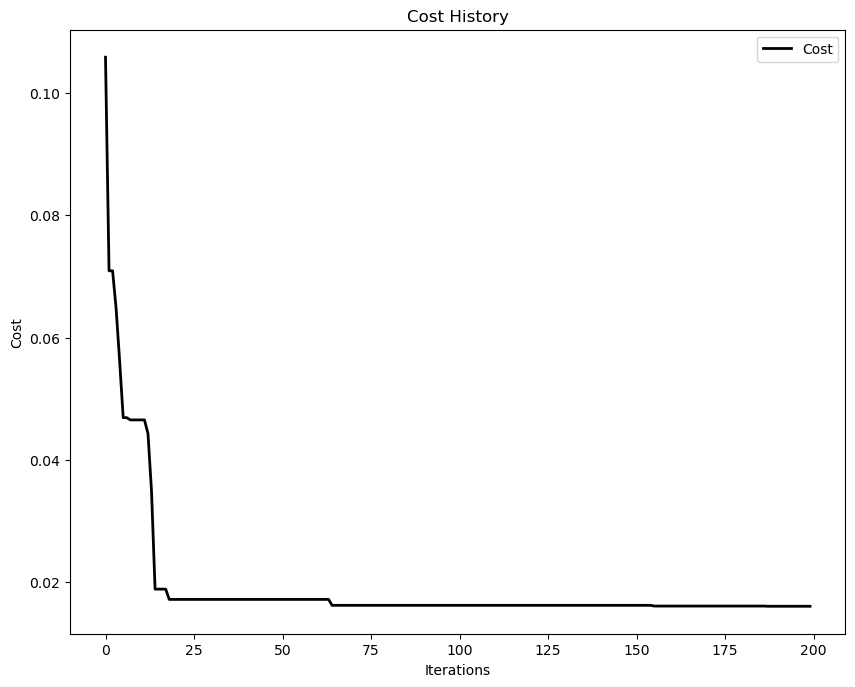

In [16]:
plot_cost_history(optimizer.cost_history)
plt.show()

In [17]:
print(pos_final)

[0.1599 0.9989 2.2911]


In [18]:
sc = pos_final[0]
A = pos_final[1]
lc = pos_final[2]

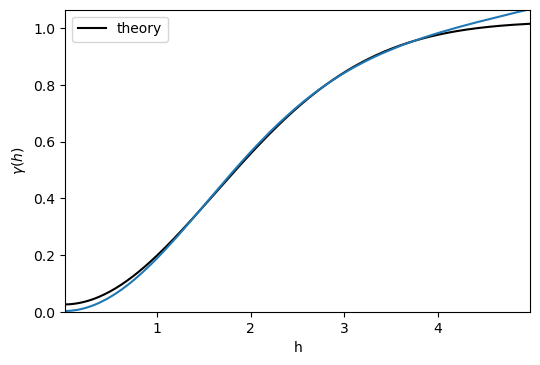

In [19]:
var_theo = theoretical(h=var_exp.h)
var_theo.gauss(sc, A, lc)
var_theo.draw(kind='normal')
plt.plot(var_exp.h, var_exp.variogram)